## **LSTM model for stock price analysis**

Importing the necessary packages

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Reading the file

In [7]:
df = pd.read_csv('Price.csv')
df.shape

(1009, 7)

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Changing the index to Date column

In [11]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Visualizing the closing price

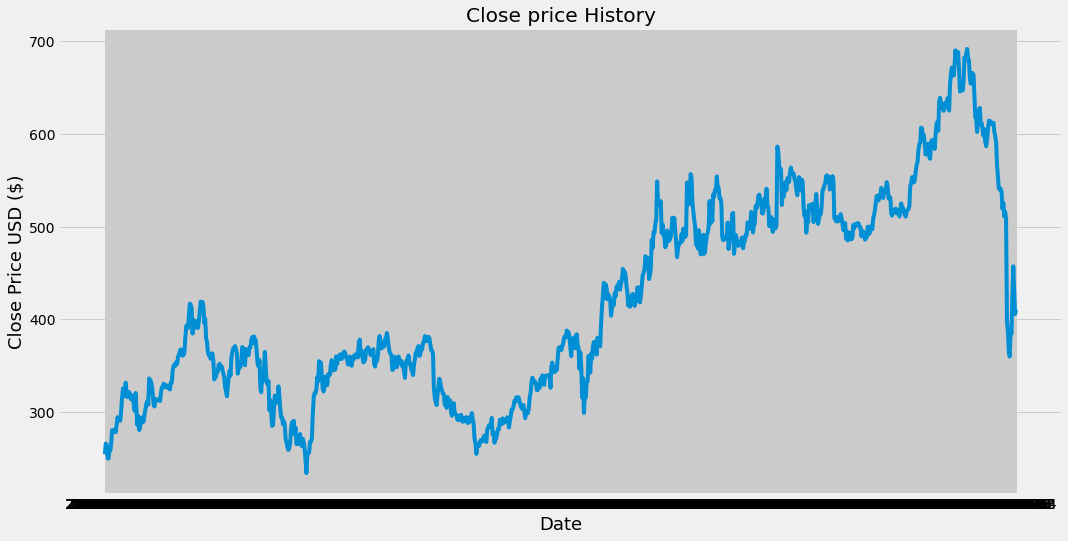

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Creating a new dataframe with only the "Close column"

In [13]:
data = df.filter(['Close'])

Converting the dataframe into a numpy array and setting the number of rows to train the model on

In [14]:
dataset = data.values

training_data_len=math.ceil( len(dataset)*.8)

training_data_len

808

Scaling the data

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

Creating the training dataset with the scaled data

In [16]:
train_data = scaled_data[0:training_data_len,:]

Splitting the data into training and testing sets

In [17]:
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

Converting the train and test sets into arrays (for reshaping)

In [18]:
x_train,y_train = np.array(x_train),np.array(y_train)

Reshaping the data(The LSTM model expects 3 dimensions)

In [19]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

Building the model

In [20]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Compiling the model

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Training the model


In [37]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

748/748 [==============================] - 12s 15ms/step - loss: 9.3919e-04


Creating the testing datasets

In [38]:
test_data = scaled_data[training_data_len-60:,:]

Creating the datases x_test and y_test

In [39]:
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

Converting the data to a numpy array


In [40]:
x_test = np.array(x_test)

Reshaping the data

In [41]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1 ))

Getting the models predicted price values


In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 0s 11ms/step


Root mean squared error(RMSE)


In [43]:
rmse = np.sqrt( np.mean(predictions-y_test)**2 )
rmse

6.878158319476836

Visualizing the data


C:\Users\Anujit\AppData\Local\Temp\ipykernel_18576\4269100639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


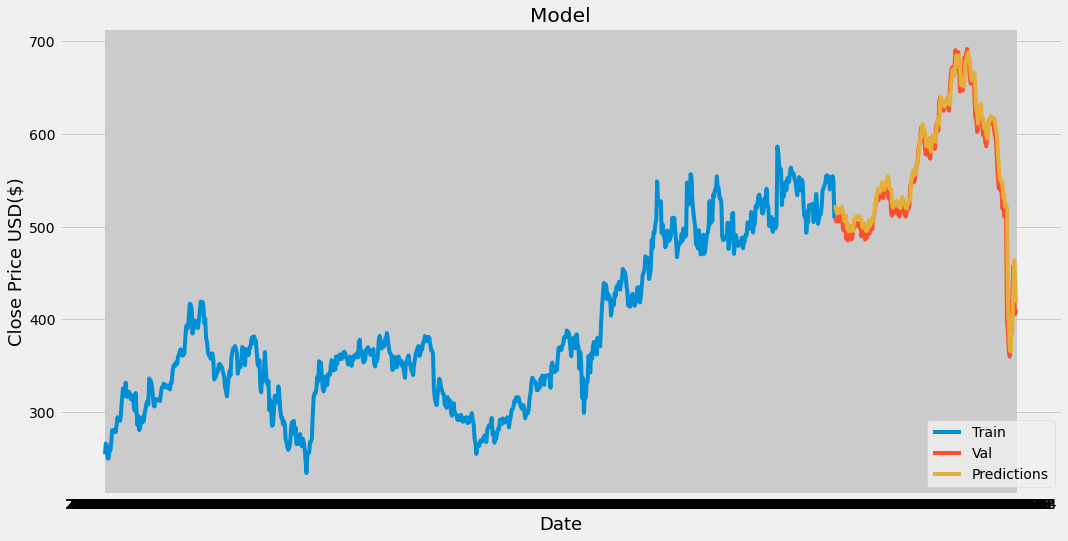

In [44]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

Valid and predicted prices


In [45]:
valid

,Close,Predictions
Date,,
2021-04-22,508.779999,523.610535
2021-04-23,505.549988,517.584717
2021-04-26,510.299988,514.111938
2021-04-27,505.549988,518.182800
2021-04-28,506.519989,515.070557
...,...,...
2022-01-31,427.140015,393.953857
2022-02-01,457.130005,431.536865
2022-02-02,429.480011,463.603577
